In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification

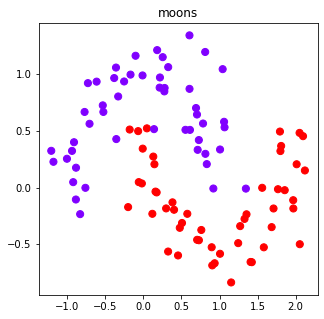

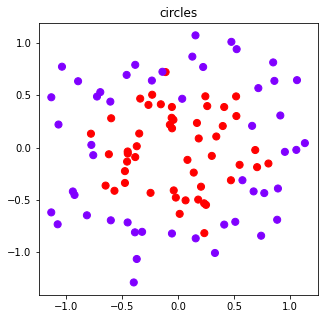

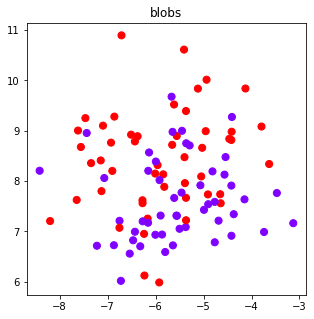

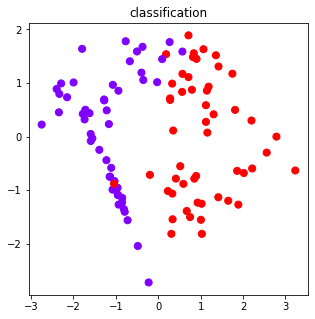

In [2]:
n_samples=100
datasets=[
    make_moons(n_samples=n_samples,noise=0.2,random_state=0)
    ,make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=1)
    ,make_blobs(n_samples=n_samples,centers=2,random_state=5)
    ,make_classification(n_samples=n_samples
                         ,n_features=2
                         ,n_informative=2#有用的信息量的个数
                         ,n_redundant=0#没用信息的个数
                         ,random_state=5)
]
kernel=["linear","poly","rbf","sigmoid"]
data_names=["moons","circles","blobs","classification"]
for i,(X,Y)in enumerate(datasets):
    plt.figure(figsize=(5,5))
    plt.title(data_names[i])
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="rainbow")

In [51]:
kernel=["linear","poly","rbf","sigmoid"]
X,Y=datasets[0]
print(X.shape,Y.shape)
svc=svm.SVC(kernel=kernel[0],gamma=2).fit(X,Y)
svc.score(X,Y)

(100, 2) (100,)


0.88

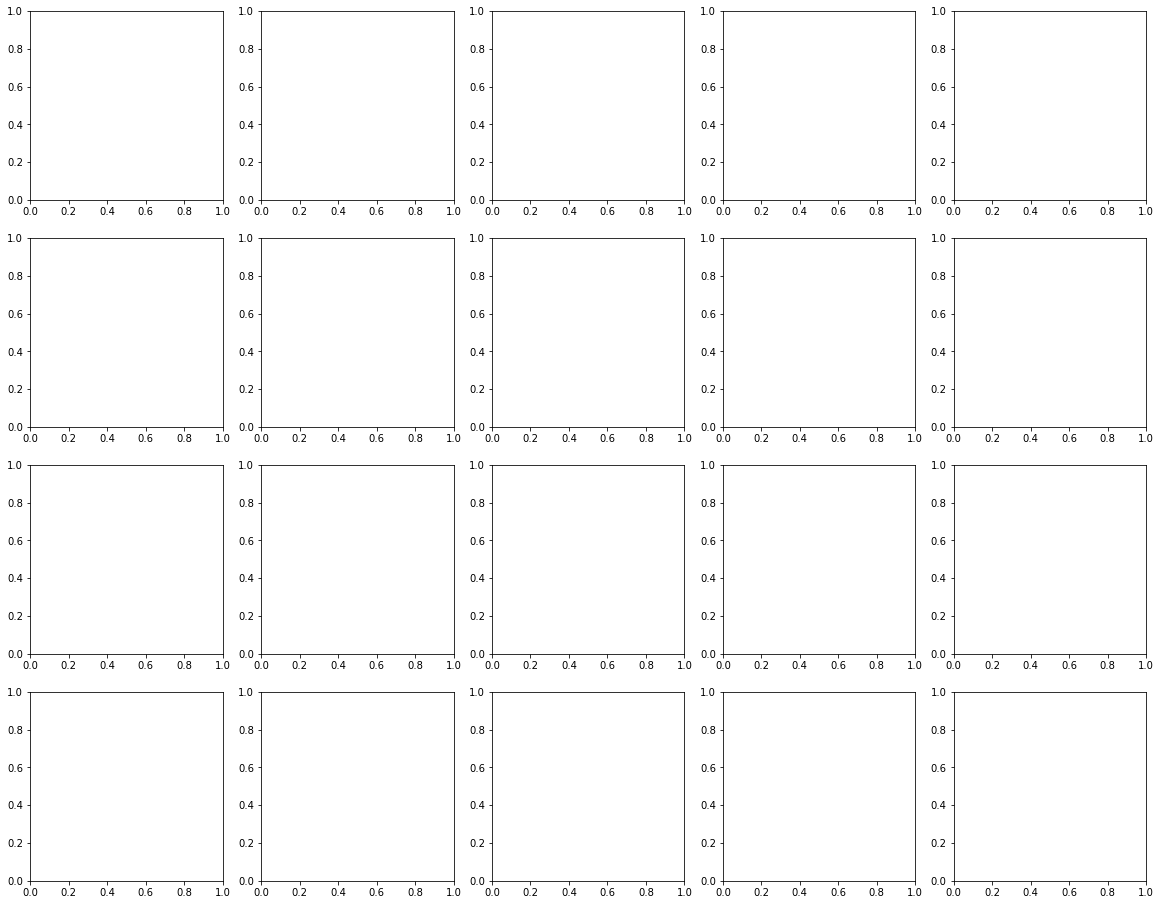

In [8]:
nrows=len(datasets)
ncols=len(kernel)+1
fig,axes=plt.subplots(nrows,ncols,figsize=(20,16))

In [37]:
for X,Y in datasets:
    print(X.shape,Y.shape)

(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)
(100, 2) (100,)


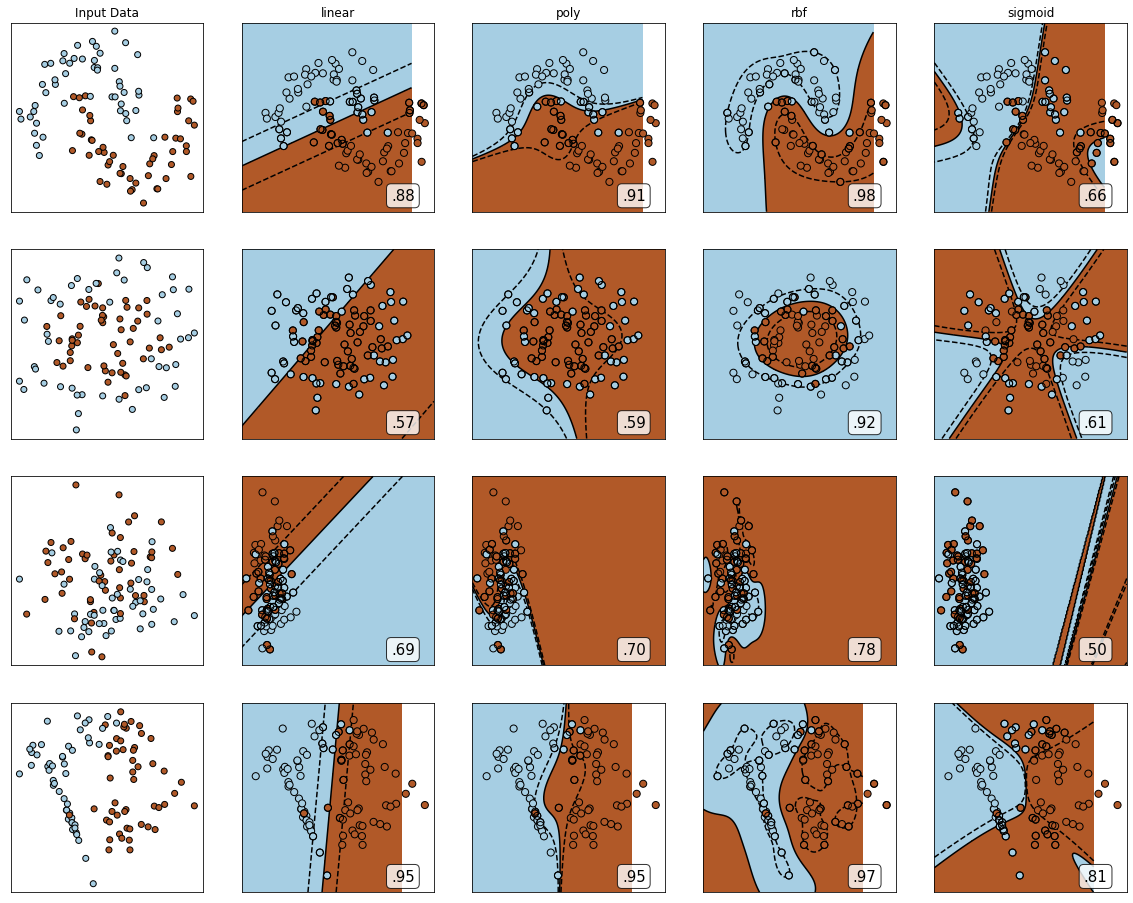

In [62]:
nrows=len(datasets)
ncols=len(kernel)+1
fig,axes=plt.subplots(nrows,ncols,figsize=(20,16))
for ds_cnt,(X,Y) in enumerate(datasets):
    #在图像的第一列放置原数据的分布
    ax=axes[ds_cnt,0]
    if ds_cnt==0:
        ax.set_title("Input Data")
    ax.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    for edge,k in enumerate(kernel):

        ax=axes[ds_cnt,edge+1]
        clf=svm.SVC(kernel=k,gamma=2)
        clf=clf.fit(X,Y)
        score=clf.score(X,Y)
        #绘制图本身的散点图
        ax.scatter(X[:,0],X[:,1],c=Y,s=50,zorder=10,cmap=plt.cm.Paired,edgecolors="K")
        #绘制支持向量机
        ax.scatter(clf.support_vectors_[:,0]
                   ,clf.support_vectors_[:,1]
                   ,s=50,facecolors="none"
                   ,zorder=10,edgecolors="k")
        x_min,x_max=X[:,0].min()-0.5,X[:,1].max()+0.5
        y_min,y_max=X[:,1].min()-0.5,X[:,1].max()+0.5
        '''
        np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        一次性使用最大值和最小值来生成网格
        表示为[起始值：结束值：步长]
        如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        '''
        XX,YY=np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        Z=clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape)
        ax.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)
        ax.contour(XX,YY,Z,colors=["k","k","k"],linestyles=["--","-","--"],levels=[-1,0,1])
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt==0:
            ax.set_title(k)
        #为每张图添加分类的分数
        ax.text(0.9,0.06,("%.2f" %score).lstrip("0")
                ,size=15
               ,bbox=dict(boxstyle="round",alpha=0.8,facecolor="white")#为分数添加一个白色格子作为底色
               ,transform=ax.transAxes#确定文字多对应的坐标轴，就是ax子图的坐标轴本身
               ,horizontalalignment="right")#位于坐标轴的什么方向
# plt.tight_layout()        
plt.show()